<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/Models_dnn_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E1 BANK CHURN**

##### About Dataset
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

##### Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.


The submitted probabilities for a given row are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, predicted probabilities are replaced with
.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Churn_Modelling.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
#!pip install MiniSom
!pip install BorutaShap

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display
from IPython.display import clear_output
from prettytable import PrettyTable

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
# Only the TensorFlow backend supports string inputs.
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from keras import layers
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.integration import LightGBMPruningCallback, XGBoostPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
# Feature selection
from BorutaShap import BorutaShap
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 14.343761682510376 sec


<Figure size 640x480 with 0 Axes>

In [3]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.13.1
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.1
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.3


In [4]:
def seed_everything(seed,
                    tensorflow_init=True,
                    pytorch_init=True):
    """
    Seeds basic parameters for reproducibility of results
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    if tensorflow_init is True:
        tf.random.set_seed(seed)
    if pytorch_init is True:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False


seed_everything(42,tensorflow_init=True,pytorch_init=False)

### **1.1 Utility Functions**

#### Graph Functions:

In [5]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = desc['50%'].values
    summ['mean'] = desc['mean'].values
    return summ

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix

    Parameters
    ----------
    `y_true`: ground truth (or actual) values
    `y_pred`: predicted values
    `labels`: integer encoded target values

    Returns none.
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.show()

def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.

    Parameters
    ----------
    `matrix`: 2D array
    `title`: title
    `labels`: integer encoded target values

    Returns none.
    """
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('val_loss')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

#### NN Functions:

In [6]:
def encode_inputs(inputs, list_categorical_nn, Cat_Feat_Entries, num_dense_exp=False, embedding_dims=8, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):
        if feature_name in list_categorical_nn:

          vocabulary = Cat_Feat_Entries[feature_name]

          embedding = layers.Embedding(input_dim=vocabulary, output_dim=embedding_dims, name=f"embedder_{counter}")
          # Convert the index values to embedding representations.
          encoded_categorical_feature = embedding(inputs[feature_name])

          encoded_categorical_feature_list.append(encoded_categorical_feature)

        else:
          # Use the numerical features as-is.
          numerical_feature = tf.expand_dims(inputs[feature_name], -1) #inputs[feature_name] #tf.expand_dims(inputs[feature_name], -1)

          if num_dense_exp:
            numerical_feature = layers.Dense(embedding_dims, name=f"dense_num_{counter}")(numerical_feature)

          numerical_feature_list.append(numerical_feature)

    return encoded_categorical_feature_list, numerical_feature_list


class dense_residual_block(keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.25, activation="relu", kr=0, attention=False, name="drb"):   #tf.keras.regularizers.L2(l2=0.01)
        super(dense_residual_block, self).__init__()
        self.units = units

        self.linear_dense = tf.keras.layers.Dense(units, name=f"lin_dense_0_{name}")
        self.project = tf.keras.layers.Dense(units, name=f"lin_dense_prj_{name}")

        self.batchnorm_0 = tf.keras.layers.BatchNormalization(name=f"bn_0_{name}")
        self.batchnorm_1 = tf.keras.layers.BatchNormalization(name=f"bn_1_{name}")
        self.batchnorm_prj = tf.keras.layers.BatchNormalization(name=f"bn_prj_{name}")
        self.dropout = tf.keras.layers.Dropout(dropout_rate,name=f"do_0_{name}")
        self.layer_norm = tf.keras.layers.BatchNormalization(name=f"bn_2_{name}") #LayerNormalization()
        self.add_layer = tf.keras.layers.Add(name=f"add_0_{name}")

        self.attention=attention
        self.attention_layer = tf.keras.layers.Attention(name=f"attention_{name}")

        if activation=="gelu":
          self.activation_0 = tf.keras.activations.gelu
          self.activation_1 = tf.keras.activations.gelu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="relu":
          self.activation_0 = tf.keras.activations.relu
          self.activation_1 = tf.keras.activations.relu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="elu":
          self.activation_0 = tf.keras.activations.elu
          self.activation_1 = tf.keras.activations.elu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="swish":
          self.activation_0 = tf.keras.activations.swish
          self.activation_1 = tf.keras.activations.swish
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="selu":
          self.activation_0 = tf.keras.activations.selu
          self.activation_1 = tf.keras.activations.selu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="lecun_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="leaky_relu":
          self.activation_0 = tf.keras.layers.LeakyReLU()
          self.activation_1 = tf.keras.layers.LeakyReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="prelu":
          self.activation_0 = tf.keras.layers.PReLU()
          self.activation_1 = tf.keras.layers.PReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")

    def call(self, inputs):

        if self.attention==True:
          attention = self.attention_layer([inputs, inputs])
        else:
          attention = inputs

        x = self.dense_0(attention)
        x = self.batchnorm_0(x)
        x = self.activation_0(x)
        x = self.dropout(x)

        x = self.linear_dense(x)
        x = self.batchnorm_1(x)

        if attention.shape[-1] != self.units:
            inputs = self.project(attention)
            inputs = self.batchnorm_prj(inputs)

        return self.add_layer([x, inputs])

class dense_block(keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.25, activation="relu", kr=0, name="dense_block"):   #tf.keras.regularizers.L2(l2=0.01)
        super(dense_block, self).__init__()
        self.units = units

        self.linear_dense = tf.keras.layers.Dense(units, name=f"lin_dense_0_{name}")
        self.project = tf.keras.layers.Dense(units, name=f"lin_dense_prj_{name}")

        self.batchnorm_0 = tf.keras.layers.BatchNormalization(name=f"bn_0_{name}")
        self.dropout = tf.keras.layers.Dropout(dropout_rate,name=f"do_0_{name}")
        self.layer_norm = tf.keras.layers.BatchNormalization(name=f"bn_2_{name}") #LayerNormalization()
        self.add_layer = tf.keras.layers.Add(name=f"add_0_{name}")

        if activation=="gelu":
          self.activation_0 = tf.keras.activations.gelu
          self.activation_1 = tf.keras.activations.gelu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="relu":
          self.activation_0 = tf.keras.activations.relu
          self.activation_1 = tf.keras.activations.relu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="elu":
          self.activation_0 = tf.keras.activations.elu
          self.activation_1 = tf.keras.activations.elu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="swish":
          self.activation_0 = tf.keras.activations.swish
          self.activation_1 = tf.keras.activations.swish
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="selu":
          self.activation_0 = tf.keras.activations.selu
          self.activation_1 = tf.keras.activations.selu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="lecun_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="leaky_relu":
          self.activation_0 = tf.keras.layers.LeakyReLU()
          self.activation_1 = tf.keras.layers.LeakyReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="prelu":
          self.activation_0 = tf.keras.layers.PReLU()
          self.activation_1 = tf.keras.layers.PReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")

    def call(self, inputs):

        x = self.dense_0(inputs)
        x = self.batchnorm_0(x)
        x = self.activation_0(x)
        x = self.dropout(x)

        return x

### **1.2 Connect Drives**

In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jan 29 10:53:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Connect to Google Drive:

In [8]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/"

list_directories = [folder_data,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/ already exists


## 2.0 Create Datasets

In [10]:
#train = pd.read_csv('new_train_dnn_small_norm_cat.csv',index_col=0)
train = pd.read_csv('new_train_dnn_boruta_norm_cat.csv',index_col=0)
#old_train = pd.read_csv("Churn_Modelling.csv")
#test = pd.read_csv("new_test_dnn_small_norm_cat.csv",index_col=0)
test = pd.read_csv("new_test_dnn_boruta_norm_cat.csv",index_col=0)

ensemble = pd.read_csv("ensemble_new_data.csv",index_col=0)

duplicate_results_test_df = pd.read_csv("known_test_targets.csv",index_col=0)
sample_submission = pd.read_csv('sample_submission.csv',index_col=0)

# Drop column id
#train.drop('id',axis=1,inplace=True)
#test.drop('id',axis=1,inplace=True)
#old_train.dropna(inplace=True,axis=0)
#old_train.rename({"RowNumber":"id"},axis=1,inplace=True)
#old_train.set_index("id", inplace=True)

In [11]:
print("TRAIN DATA shape: {}".format(train.shape))
display(train.head(3))
#print("OLD-TRAIN DATA: {}".format(old_train.shape))
#display(old_train.head(3))
print("TEST DATA: {}".format(test.shape))
display(test.head(3))

TRAIN DATA shape: (165034, 44)


,Age_Category_enc,bs_nop_enc,act_nop,Surname_tfidf_1,bs_nop_count_label,HasCrCard,IsActiveMember,Age_pca_comb,CreditScore_unimp_cluster_WOE,Age-NumOfProducts_cat_count,...,NumOfProducts_cat_count,Balance_Salary,bs_active_enc,act_nop_enc,CreditScore_pca_comb_final,Balance_Range_count,Surname_tfidf_0,HasCrCard_enc,bs_age_enc,Exited
0,-2.069623,-0.924451,1,-0.499230,0,1,0,-0.555462,0,-0.953493,...,84291,1.833879,0.297783,-0.149317,1.254062,89648,-0.912774,0.261683,-0.966387,0.0
1,-0.906434,-0.306724,3,0.687939,0,1,1,-0.555462,7,-0.953493,...,84291,0.051452,-1.890492,-1.151342,-2.279961,89648,-0.893908,-0.144951,-1.494328,0.0
2,-0.137777,-2.566904,1,-1.449682,0,1,0,0.407442,0,-0.308427,...,84291,2.028678,0.553561,-0.253912,-5.440209,89648,0.830234,-1.274168,-0.131707,0.0


TEST DATA: (110023, 43)


,Age_Category_enc,bs_nop_enc,act_nop,Surname_tfidf_1,bs_nop_count_label,HasCrCard,IsActiveMember,Age_pca_comb,CreditScore_unimp_cluster_WOE,Age-NumOfProducts_cat_count,...,Balance_pca_comb,NumOfProducts_cat_count,Balance_Salary,bs_active_enc,act_nop_enc,CreditScore_pca_comb_final,Balance_Range_count,Surname_tfidf_0,HasCrCard_enc,bs_age_enc
0,-1.279208,-1.236768,3,-0.877196,0,0,1,-2.131682,1,-2.345158,...,5.199338,84291,1.187295,-0.945019,-0.748820,0.109902,89648,0.432104,0.399311,-1.200575
1,1.059063,1.959783,0,0.036391,2,1,0,0.997920,0,1.166919,...,5.199338,77374,0.210348,0.450468,1.351334,-4.404257,89648,-0.235509,-0.526706,1.171625
2,-0.496432,-0.963318,1,0.036391,0,1,0,-0.408805,7,-0.840906,...,5.199338,84291,0.851665,0.187291,-0.573484,-2.099692,89648,-0.235509,0.577720,-0.738212


In [12]:
#total = pd.concat([train,test],axis=0,ignore_index=True)
#train = total.iloc[:len(train),:]
#test = total.iloc[len(train):,:]
#cat_col

In [13]:
train = train.astype("float")
test = test.astype("float")
cat_col = [name for name in train.columns if train[name].nunique()<25]

#train_=train.copy()
train[cat_col] = train[cat_col].astype("int")
cat_col.remove("Exited")
test[cat_col] = test[cat_col].astype("int")
summary(train).style.background_gradient(cmap='Reds')

data shape: (165034, 44)


,data type,#missing,%missing,#unique,min,max,median,mean
Age_Category_enc,float64,0,0.000000,165033,-5.199338,5.199338,-0.000014,-0.000678
bs_nop_enc,float64,0,0.000000,165025,-5.199338,5.199338,0.004491,0.002825
act_nop,int64,0,0.000000,5,0.000000,4.000000,2.000000,1.574748
Surname_tfidf_1,float64,0,0.000000,1007,-5.199338,5.199338,0.036391,0.004019
bs_nop_count_label,int64,0,0.000000,5,0.000000,4.000000,1.000000,1.075778
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000,0.753954
IsActiveMember,int64,0,0.000000,2,0.000000,1.000000,0.000000,0.497770
Age_pca_comb,float64,0,0.000000,74,-5.199338,5.199338,0.005018,-0.004031
CreditScore_unimp_cluster_WOE,int64,0,0.000000,10,0.000000,9.000000,5.000000,4.177091
Age-NumOfProducts_cat_count,float64,0,0.000000,197,-5.199338,5.199338,0.005018,-0.000006


In [14]:
summary(test).style.background_gradient(cmap='Reds')

data shape: (110023, 43)


,data type,#missing,%missing,#unique,min,max,median,mean
Age_Category_enc,float64,0,0.000000,110023,-5.199338,3.409998,0.001641,-0.000603
bs_nop_enc,float64,0,0.000000,110019,-5.199338,5.199338,0.000164,-0.001644
act_nop,int64,0,0.000000,5,0.000000,4.000000,2.000000,1.566836
Surname_tfidf_1,float64,0,0.000000,1006,-5.199338,5.199338,0.036391,0.003360
bs_nop_count_label,int64,0,0.000000,5,0.000000,4.000000,1.000000,1.070113
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000,0.753043
IsActiveMember,int64,0,0.000000,2,0.000000,1.000000,0.000000,0.495233
Age_pca_comb,float64,0,0.000000,77,-5.199338,5.199338,0.005018,-0.004464
CreditScore_unimp_cluster_WOE,int64,0,0.000000,10,0.000000,9.000000,5.000000,4.155922
Age-NumOfProducts_cat_count,float64,0,0.000000,201,-5.199338,5.199338,0.001255,-0.003742


## **3.0 Dataset Manager:**


In [15]:
strat_feature = train["Exited"]

X=train.drop(columns=["Exited"]).copy()
y=train["Exited"].copy()
X_test=test.copy()

X.shape[1]==X_test.shape[1]

True

In [16]:
num_var = X.select_dtypes("float").columns
list_to_stand = [name for name in num_var if X[name].nunique()>25]

scaler = QuantileTransformer(subsample=50_000, output_distribution="normal",random_state=42)

X[list_to_stand] = scaler.fit_transform(X[list_to_stand])
X_test[list_to_stand] = scaler.transform(X_test[list_to_stand])

In [17]:
summary(X.select_dtypes("int")).style.background_gradient(cmap='Reds')

data shape: (165034, 14)


,data type,#missing,%missing,#unique,min,max,median,mean
act_nop,int64,0,0.000000,5,0.000000,4.000000,2.000000,1.574748
bs_nop_count_label,int64,0,0.000000,5,0.000000,4.000000,1.000000,1.075778
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000,0.753954
IsActiveMember,int64,0,0.000000,2,0.000000,1.000000,0.000000,0.497770
CreditScore_unimp_cluster_WOE,int64,0,0.000000,10,0.000000,9.000000,5.000000,4.177091
bs_nop,int64,0,0.000000,5,0.000000,4.000000,2.000000,1.720379
Geography_count_label-NumOfProducts_cat_count,int64,0,0.000000,9,-84291.000000,-3367.000000,-84289.000000,-79395.477859
act_age,int64,0,0.000000,12,0.000000,11.000000,5.000000,4.166566
Geography_count/NumOfProducts_cat_count_label,int64,0,0.000000,5,-5.000000,1.000000,0.000000,0.144946
bs_active,int64,0,0.000000,4,0.000000,3.000000,2.000000,1.645522


In [18]:
encoder = OrdinalEncoder()
to_encode = ["Geography_count_label-NumOfProducts_cat_count","Geography_count/NumOfProducts_cat_count_label","bs_nop_count","NumOfProducts_cat_count","Balance_Range_count"]
X[to_encode] = encoder.fit_transform(X[to_encode])
X[to_encode] = X[to_encode].astype("int")
X_test[to_encode] = encoder.fit_transform(X_test[to_encode])

In [19]:
summary(X.select_dtypes("int")).style.background_gradient(cmap='Reds')

data shape: (165034, 14)


,data type,#missing,%missing,#unique,min,max,median,mean
act_nop,int64,0,0.000000,5,0.000000,4.000000,2.000000,1.574748
bs_nop_count_label,int64,0,0.000000,5,0.000000,4.000000,1.000000,1.075778
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000,0.753954
IsActiveMember,int64,0,0.000000,2,0.000000,1.000000,0.000000,0.497770
CreditScore_unimp_cluster_WOE,int64,0,0.000000,10,0.000000,9.000000,5.000000,4.177091
bs_nop,int64,0,0.000000,5,0.000000,4.000000,2.000000,1.720379
Geography_count_label-NumOfProducts_cat_count,int64,0,0.000000,9,0.000000,8.000000,2.000000,2.167802
act_age,int64,0,0.000000,12,0.000000,11.000000,5.000000,4.166566
Geography_count/NumOfProducts_cat_count_label,int64,0,0.000000,5,0.000000,4.000000,3.000000,3.159464
bs_active,int64,0,0.000000,4,0.000000,3.000000,2.000000,1.645522


In [20]:
summary(X.select_dtypes("float")).style.background_gradient(cmap='Blues')

data shape: (165034, 29)


,data type,#missing,%missing,#unique,min,max,median,mean
Age_Category_enc,float64,0,0.000000,165031,-5.199338,5.199338,0.002424,0.004039
bs_nop_enc,float64,0,0.000000,165025,-5.199338,5.199338,0.009085,0.004027
Surname_tfidf_1,float64,0,0.000000,1007,-5.199338,5.199338,0.033880,0.005195
Age_pca_comb,float64,0,0.000000,74,-5.199338,5.199338,0.001255,-0.006444
Age-NumOfProducts_cat_count,float64,0,0.000000,196,-5.199338,5.199338,-0.003764,-0.003649
act_age_enc,float64,0,0.000000,165030,-5.199338,5.199338,0.005600,0.000294
Age_cat*NumOfProducts_cat_count_label,float64,0,0.000000,111,-5.199338,5.199338,-5.199338,-2.259986
CustomerId,float64,0,0.000000,23218,-5.199338,5.199338,0.006273,0.005358
IsActiveMember_enc,float64,0,0.000000,165033,-5.199338,5.199338,-0.006644,-0.006912
CreditScore_cat_pca_comb_final,float64,0,0.000000,456,-5.199338,5.199338,0.000000,-0.041095


In [21]:
num_var = X.select_dtypes("float").columns
cat_var = X.select_dtypes("int").columns

X[num_var] = X[num_var].astype("float32")
X_test[num_var] = X_test[num_var].astype("int32")

In [22]:
X["Exited"] = y
weight=X[X["Exited"]==0].shape[0]/X[X["Exited"]==1].shape[0]
X["weights"] = [1 if x==0 else weight for x in X["Exited"]]
X_test["Exited"] = 0
X_test["weights"] = 1

### 3.1 Data Loading

In [23]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe["Exited"]
    weights = dataframe.pop("weights")
    dataframe = dataframe.drop(columns=["Exited"])

    ds = tf.data.Dataset.from_tensor_slices((
                                             dict(dataframe),
                                             labels,
                                             #weights
                                             ))
    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [24]:
train_dataset = dataframe_to_dataset(X, batch_size=32, shuffle=True)
test_dataset = dataframe_to_dataset(X_test, batch_size=32, shuffle=False)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 45 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Age_Category_enc                               165034 non-null  float32
 1   bs_nop_enc                                     165034 non-null  float32
 2   act_nop                                        165034 non-null  int64  
 3   Surname_tfidf_1                                165034 non-null  float32
 4   bs_nop_count_label                             165034 non-null  int64  
 5   HasCrCard                                      165034 non-null  int64  
 6   IsActiveMember                                 165034 non-null  int64  
 7   Age_pca_comb                                   165034 non-null  float32
 8   CreditScore_unimp_cluster_WOE                  165034 non-null  int64  
 9   Age-NumOfProducts_cat_count          

In [26]:
gc.collect()

159

### 3.2 Test FeatureSpace

In [27]:
#X_fs = X.sample(frac=0.5,random_state=17)
#train_dataset_fs = dataframe_to_dataset(X_fs, batch_size=64, shuffle=True)

In [28]:
X.columns

Index(['Age_Category_enc', 'bs_nop_enc', 'act_nop', 'Surname_tfidf_1',
       'bs_nop_count_label', 'HasCrCard', 'IsActiveMember', 'Age_pca_comb',
       'CreditScore_unimp_cluster_WOE', 'Age-NumOfProducts_cat_count',
       'bs_nop', 'Geography_count_label-NumOfProducts_cat_count',
       'act_age_enc', 'act_age', 'Age_cat*NumOfProducts_cat_count_label',
       'CustomerId', 'Geography_count/NumOfProducts_cat_count_label',
       'IsActiveMember_enc', 'CreditScore_cat_pca_comb_final', 'bs_active',
       'Age_pca_comb_pca_comb_final', 'Balance_Range', 'bs_gender_enc',
       'quant_EstimatedSalary', 'Surname_tfidf_2', 'bs_nop_count',
       'Surname_tfidf_3', 'Gender_enc', 'Tenure_enc', 'Balance_Range_enc',
       'Surname_tfidf_4', 'Balance-NumOfProducts_cat_count_label',
       'Geo_Gender_enc', 'Balance_pca_comb', 'NumOfProducts_cat_count',
       'Balance_Salary', 'bs_active_enc', 'act_nop_enc',
       'CreditScore_pca_comb_final', 'Balance_Range_count', 'Surname_tfidf_0',
       

In [29]:
num_var,cat_var

(Index(['Age_Category_enc', 'bs_nop_enc', 'Surname_tfidf_1', 'Age_pca_comb',
        'Age-NumOfProducts_cat_count', 'act_age_enc',
        'Age_cat*NumOfProducts_cat_count_label', 'CustomerId',
        'IsActiveMember_enc', 'CreditScore_cat_pca_comb_final',
        'Age_pca_comb_pca_comb_final', 'bs_gender_enc', 'quant_EstimatedSalary',
        'Surname_tfidf_2', 'Surname_tfidf_3', 'Gender_enc', 'Tenure_enc',
        'Balance_Range_enc', 'Surname_tfidf_4',
        'Balance-NumOfProducts_cat_count_label', 'Geo_Gender_enc',
        'Balance_pca_comb', 'Balance_Salary', 'bs_active_enc', 'act_nop_enc',
        'CreditScore_pca_comb_final', 'Surname_tfidf_0', 'HasCrCard_enc',
        'bs_age_enc'],
       dtype='object'),
 Index(['act_nop', 'bs_nop_count_label', 'HasCrCard', 'IsActiveMember',
        'CreditScore_unimp_cluster_WOE', 'bs_nop',
        'Geography_count_label-NumOfProducts_cat_count', 'act_age',
        'Geography_count/NumOfProducts_cat_count_label', 'bs_active',
        'Bal

In [30]:
%%time
feature_space = FeatureSpace(
                            features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="int") for a in cat_var},**{b:FeatureSpace.float() for b in num_var}},
                            output_mode="dict"
                            )

train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
print("Adapting Features Space....")
feature_space.adapt(train_ds_with_no_labels)

#preprocessed_train_ds = train_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
#preprocessed_test_ds = test_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

Cause: could not parse the source code of <function <lambda> at 0x7fae8addfb50>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fae8addfb50>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Adapting Features Space....


Cause: could not parse the source code of <function <lambda> at 0x7fae8addfe20>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fae8addfe20>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fae444ef130>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fae444ef130>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CPU times: user 4min 34s, sys: 42.8 s, total: 5min 17s
Wall time: 3min 27s


In [31]:
gc.collect()

2001

In [32]:
for X_,y_ in preprocessed_train_ds.take(1):
  print(len(X_.keys()))
  print(y_.shape)
#  print(w_.shape)

43
(32,)


## **4.0 MODELS**

### 4.1 Baseline:

In [33]:
list_categorical_nn = [name for name in X.drop(columns="Exited").select_dtypes("int").columns]
Cat_Feat_Entries = {name: X[name].nunique() for name in X.drop(columns="Exited").select_dtypes("int").columns}

In [34]:
list_categorical_nn

['act_nop',
 'bs_nop_count_label',
 'HasCrCard',
 'IsActiveMember',
 'CreditScore_unimp_cluster_WOE',
 'bs_nop',
 'Geography_count_label-NumOfProducts_cat_count',
 'act_age',
 'Geography_count/NumOfProducts_cat_count_label',
 'bs_active',
 'Balance_Range',
 'bs_nop_count',
 'NumOfProducts_cat_count',
 'Balance_Range_count']

In [35]:
1/0.33

3.0303030303030303

In [40]:
def create_baseline_model(fs,name="baseline_model",learning_rate = 0.001,
                          activation="relu",dropout=0.5,hidden_layers=2,
                          units_0=256,kr=0,num_dense_exp=False,output_bias=None,
                          embedding_dims=16):

  encoded_features = fs.get_encoded_features()
  # Wide Leg
  cat,num = encode_inputs(encoded_features, list_categorical_nn=list_categorical_nn, Cat_Feat_Entries=Cat_Feat_Entries, embedding_dims=embedding_dims, name="enc_wide",num_dense_exp=num_dense_exp)

#  wide_cat = tf.keras.layers.concatenate(cat, name="wide_cat_concat")
  wide_cat = tf.stack(cat, name="wide_cat_concat",axis=1)

#  wide_num = tf.keras.layers.concatenate(num, name="wide_num_concat")
  wide_num = tf.stack(num, name="wide_num_concat",axis=1)

  if num_dense_exp==False:
    wide_cat = layers.Flatten()(wide_cat)
    wide_num = layers.Flatten()(wide_num)

  final_concat = tf.keras.layers.concatenate([wide_cat,wide_num],axis=1)
  x_expanded = layers.Flatten()(final_concat)

  for tier in range(hidden_layers):
    x_expanded = dense_block(units_0, dropout_rate=dropout, activation=activation, kr=kr, name=f"dense_block_n{tier}")(x_expanded)

  if output_bias is not None:
    output = layers.Dense(1, activation="sigmoid",bias_initializer=tf.keras.initializers.Constant(output_bias))(x_expanded)
  else:
    output = layers.Dense(1, activation="sigmoid")(x_expanded)

  model = tf.keras.Model(inputs=encoded_features, outputs=output, name=name)

  model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
          loss=keras.losses.BinaryFocalCrossentropy(name="bin_foc_ce",apply_class_balancing=True,alpha=0.67),
          metrics=[keras.metrics.AUC(curve="ROC",name="auc")],
          weighted_metrics=[])

  return model

In [43]:
model = create_baseline_model(feature_space,num_dense_exp=False,embedding_dims=8)
model.summary(expand_nested=True)

Model: "baseline_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_179 (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 input_180 (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 input_186 (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 input_190 (InputLayer)      [(None, 1)]                  0         []                            
                                                                                     

In [46]:
verify_model = model.predict(preprocessed_train_ds)
verify_model.shape

5158/5158 [==============================] - 21s 3ms/step


(165034, 1)

In [ ]:
model.evaluate(preprocessed_train_ds, verbose=0)

[0.05946372449398041, 0.7833811640739441]

### 4.2 Optuna Optimization:

In [58]:
# model creation
def create_baseline_model_trial(trial):

    units_0 = trial.suggest_categorical("units_0", [256, 512, 768, 1024])
    activation = trial.suggest_categorical("activation", ["swish"])
    dropout = trial.suggest_categorical("dropout", [0.25, 0.33, 0.5])
    hidden_layers = trial.suggest_int("hidden_layers", 2, 4)
    embedding_dims = trial.suggest_int("embedding_dims", 8, 32, step=8)
    #kr = trial.suggest_categorical("kr", [0, 0.1, 1.0])
    #num_dense_exp = trial.suggest_categorical('num_dense_exp', [True, False])


    model = create_baseline_model(feature_space,name="baseline_model",learning_rate = 0.005,
                                  activation=activation,dropout=dropout,hidden_layers=hidden_layers,
                                  units_0=units_0,kr=0,num_dense_exp=True, embedding_dims=embedding_dims)


    return model

In [59]:
gc.collect()

1398

In [60]:
# Function to get hardware strategy
def get_hardware_strategy():
    try:
        # TPU detection. No parameters necessary if TPU_NAME environment variable is
        # set: this is always the case on Kaggle.
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        print('Running on TPU ', tpu.master())
    except ValueError:
        tpu = None

    if tpu:
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
        tf.config.optimizer.set_jit(True)
    else:
        # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
        strategy = tf.distribute.get_strategy()

    return tpu, strategy

tpu, strategy = get_hardware_strategy()

In [61]:
cat_var,num_var

(Index(['act_nop', 'bs_nop_count_label', 'HasCrCard', 'IsActiveMember',
        'CreditScore_unimp_cluster_WOE', 'bs_nop',
        'Geography_count_label-NumOfProducts_cat_count', 'act_age',
        'Geography_count/NumOfProducts_cat_count_label', 'bs_active',
        'Balance_Range', 'bs_nop_count', 'NumOfProducts_cat_count',
        'Balance_Range_count'],
       dtype='object'),
 Index(['Age_Category_enc', 'bs_nop_enc', 'Surname_tfidf_1', 'Age_pca_comb',
        'Age-NumOfProducts_cat_count', 'act_age_enc',
        'Age_cat*NumOfProducts_cat_count_label', 'CustomerId',
        'IsActiveMember_enc', 'CreditScore_cat_pca_comb_final',
        'Age_pca_comb_pca_comb_final', 'bs_gender_enc', 'quant_EstimatedSalary',
        'Surname_tfidf_2', 'Surname_tfidf_3', 'Gender_enc', 'Tenure_enc',
        'Balance_Range_enc', 'Surname_tfidf_4',
        'Balance-NumOfProducts_cat_count_label', 'Geo_Gender_enc',
        'Balance_pca_comb', 'Balance_Salary', 'bs_active_enc', 'act_nop_enc',
        '

In [62]:
kf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1978)

def objective(trial):
    validation=0.2
    # Clear clutter from previous session graphs.
    keras.backend.clear_session()
    #keras.utils.clear_session()
    # Trial Score
    Scores_try=[]

    # define Dataset:
    for k, (train_index, test_index) in enumerate(kf.split(X, X["Exited"])):

        train_examples = len(train_index)
        train_examples = int(train_examples * (1 - validation))
        train_index, val_index = train_index[:train_examples], train_index[train_examples:]

        train_x, valid_x = X.iloc[train_index,:], X.iloc[val_index,:]
        test_x_ = X.iloc[test_index,:]

        train_dataset_ = dataframe_to_dataset(train_x, batch_size=256, shuffle=True)
        valid_dataset_ = dataframe_to_dataset(valid_x, batch_size=256, shuffle=True)
        test_dataset_ = dataframe_to_dataset(test_x_, batch_size=256, shuffle=False)

        feature_space = FeatureSpace(
                                    features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="int") for a in cat_var},**{b:FeatureSpace.float() for b in num_var}},
                                    output_mode="dict"
                                    )

        train_ds_with_no_labels = train_dataset_.map(lambda x, *_: x)
        print("Adapting Features Space....")
        feature_space.adapt(train_ds_with_no_labels)

#        preprocessed_train_ds = train_dataset_.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
#        preprocessed_valid_ds = valid_dataset_.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
#        preprocessed_test_ds = test_dataset_.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

        preprocessed_train_ds = train_dataset_.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
        preprocessed_valid_ds = valid_dataset_.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
        preprocessed_test_ds = test_dataset_.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

        model = create_baseline_model_trial(trial)

        stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=12, restore_best_weights=True, start_from_epoch=5)
        reduce_ = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.00001)


        model.fit(preprocessed_train_ds,
                  epochs=60,
                  callbacks=[stop_early,reduce_,TFKerasPruningCallback(trial, "auc")],
                  validation_data=preprocessed_valid_ds)


        score_ = model.evaluate(preprocessed_test_ds, verbose=0)
        Scores_try.append(score_[1])

    # Evaluate the model accuracy on the validation set.
    score = np.mean(Scores_try)
    del feature_space
    del model
    del preprocessed_train_ds
    del preprocessed_valid_ds
    del preprocessed_test_ds
    gc.collect()

    return score

In [63]:
# Create study object
study = optuna.create_study(direction="maximize", study_name="baseline_opt_all", pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))

# Run optimization process
study.optimize(objective, n_trials=10, show_progress_bar=True)

[I 2024-01-29 11:59:31,636] A new study created in memory with name: baseline_opt_all


  0%|          | 0/10 [00:00<?, ?it/s]

Adapting Features Space....
Epoch 1/60
344/344 [==============================] - 26s 28ms/step - loss: 0.0581 - auc: 0.8521 - val_loss: 0.0449 - val_auc: 0.8802 - lr: 0.0050
Epoch 2/60
344/344 [==============================] - 9s 21ms/step - loss: 0.0441 - auc: 0.8747 - val_loss: 0.0447 - val_auc: 0.8808 - lr: 0.0050
Epoch 3/60
344/344 [==============================] - 10s 24ms/step - loss: 0.0439 - auc: 0.8760 - val_loss: 0.0474 - val_auc: 0.8800 - lr: 0.0050
Epoch 4/60
344/344 [==============================] - 9s 22ms/step - loss: 0.0433 - auc: 0.8786 - val_loss: 0.0450 - val_auc: 0.8811 - lr: 0.0050
Epoch 5/60
344/344 [==============================] - 9s 23ms/step - loss: 0.0434 - auc: 0.8785 - val_loss: 0.0431 - val_auc: 0.8831 - lr: 0.0050
Epoch 6/60
344/344 [==============================] - 10s 24ms/step - loss: 0.0426 - auc: 0.8818 - val_loss: 0.0430 - val_auc: 0.8809 - lr: 0.0050
Epoch 7/60
344/344 [==============================] - 10s 23ms/step - loss: 0.0427 - auc: 0.8

{'units_0': 704, 'activation': 'swish', 'dropout': 0.36962894665903023, 'hidden_layers': 3, 'num_dense_exp': True}. Best is trial 15 with value: 0.8874946766429477.

{'units_0': 320, 'activation': 'gelu', 'dropout': 0.323414848307589, 'hidden_layers': 2} trial 2 with value: 0.8871975276205275.

AUC: 0.8870259126027426
Best hyperparameters: {'units_0': 768, 'activation': 'swish', 'dropout': 0.2551166017702234, 'hidden_layers': 3}

{'units_0': 1024, 'activation': 'swish', 'dropout': 0.5, 'hidden_layers': 2, 'embedding_dims': 32}. Best is trial 2 with value: 0.8870233562257555.

In [66]:
trial = study.best_trial
print('AUC: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

AUC: 0.8870233562257555
Best hyperparameters: {'units_0': 1024, 'activation': 'swish', 'dropout': 0.5, 'hidden_layers': 2, 'embedding_dims': 32}


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

### 4.3 Fit the Model - No OverSampling

In [ ]:
neg, pos = np.bincount(X['Exited'])
Best_Model={'units_0': 704, 'activation': 'swish', 'dropout': 0.37, 'hidden_layers': 3}

initial_bias = np.log([pos/neg])
initial_bias

array([-1.31531494])

In [ ]:
def run_experiment(train, test_data, input_format="dict", experiment_name="model_baseline", splits=5, num_epochs=300, batch_size=32, n_repeats=8, rs=42, param=Best_Model, biases=initial_bias):

  skf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=n_repeats, random_state=rs)

  test_results_df_all = pd.DataFrame(index=test_data.index, columns=list(range(splits*n_repeats)))

  test_results_df = pd.DataFrame(index=test_data.index, columns=["Exited"])

  all_logloss = []
  all_AUC_roc = []


  for i, (train_index, valid_index) in enumerate(skf.split(X,X["Exited"])):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = train.iloc[train_index,:]
    X_val = train.iloc[valid_index,:]

    train_dataset_ = dataframe_to_dataset(X_trn, batch_size=256, shuffle=True)
    valid_dataset_ = dataframe_to_dataset(X_val, batch_size=256, shuffle=False)
    test_dataset_ = dataframe_to_dataset(test_data, batch_size=256, shuffle=False)

    feature_space = FeatureSpace(
                                features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="int") for a in cat_var},**{b:FeatureSpace.float() for b in num_var}},
                                output_mode=input_format
                                )

    train_ds_with_no_labels = train_dataset_.map(lambda x, *_: x)
    print("Adapting Features Space....")
    feature_space.adapt(train_ds_with_no_labels)

    preprocessed_train_ds = train_dataset_.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_valid_ds = valid_dataset_.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_test_ds = test_dataset_.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

    # Callbacks:
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_auc",
                                                      patience=30,
                                                      restore_best_weights=True,
                                                      start_from_epoch=5,
                                                      verbose=1,
                                                      mode='max')

    reduce_on_plat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc',
                                                          factor=0.5,
                                                          patience=5,
                                                          mode="max",
                                                          min_lr=0.000005)

    checkpoint_filepath = folders_nn + 'checkpoint/'
    Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_auc",
                                                    mode='max',
                                                    restore_best_weights=True,
                                                    start_from_epoch=5,
                                                    save_best_only=True)



    # Generate Model
    model = create_baseline_model(feature_space,
                                  name=experiment_name,
                                  learning_rate = 0.001,
                                  kr=0,
                                  num_dense_exp=True,
                                  output_bias=initial_bias,
                                  **Best_Model)



    print("Start training the model...")
    history = model.fit(preprocessed_train_ds,
                        epochs=num_epochs,
                        callbacks=[early_stopping,Checkpoint,reduce_on_plat],
                        validation_data=preprocessed_valid_ds)

    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    log_loss, AUC_roc = model.evaluate(preprocessed_valid_ds, verbose=0)


    plot_training_session(history)

    y_hat = model.predict(preprocessed_test_ds)
    y_hat_valid = model.predict(preprocessed_valid_ds)

    target = X_val["Exited"]
    print(y_hat_valid.shape,target.shape)
    eval = [0 if yp<0.5 else 1 for yp in y_hat_valid]
    plot_confusion_matrix(target, eval, labels=[0,1])

    print("\n",classification_report(y_true=target, y_pred=eval))
    print(f"y_hat shape:{y_hat.shape}")

    test_results_df_all.iloc[:,i] = y_hat

    model.save(f'{folders_nn+experiment_name}/CV_{i}')
    feature_space.save(f"{folders_nn+experiment_name}/CV_{i}/myfeaturespace_{experiment_name}.keras")


    print(f"AUC-Roc Score: {round(AUC_roc, 3)}%")
    all_logloss.append(round(log_loss, 3))
    all_AUC_roc.append(round(AUC_roc, 3))

    del feature_space
    del model
    del preprocessed_train_ds
    del preprocessed_valid_ds
    del preprocessed_test_ds
    gc.collect()

  test_results_df_all["Mean"] = test_results_df_all.mean(axis=1)

  test_results_df["Exited"] = test_results_df_all["Mean"].values

  print(f"All Valuation AUC_pr: {all_AUC_roc}")

  return test_results_df_all, test_results_df


Running CV 0

Adapting Features Space....
Start training the model...
Epoch 1/200
516/516 [==============================] - 31s 28ms/step - loss: 0.0520 - auc: 0.8475 - val_loss: 0.0427 - val_auc: 0.8827 - lr: 0.0010
Epoch 2/200
516/516 [==============================] - 14s 23ms/step - loss: 0.0438 - auc: 0.8766 - val_loss: 0.0422 - val_auc: 0.8835 - lr: 0.0010
Epoch 3/200
516/516 [==============================] - 14s 23ms/step - loss: 0.0432 - auc: 0.8793 - val_loss: 0.0421 - val_auc: 0.8859 - lr: 0.0010
Epoch 4/200
516/516 [==============================] - 14s 23ms/step - loss: 0.0428 - auc: 0.8811 - val_loss: 0.0421 - val_auc: 0.8864 - lr: 0.0010
Epoch 5/200
516/516 [==============================] - 14s 23ms/step - loss: 0.0429 - auc: 0.8815 - val_loss: 0.0420 - val_auc: 0.8876 - lr: 0.0010
Epoch 6/200
516/516 [==============================] - 14s 22ms/step - loss: 0.0426 - auc: 0.8828 - val_loss: 0.0418 - val_auc: 0.8872 - lr: 0.0010
Epoch 7/200
516/516 [====================

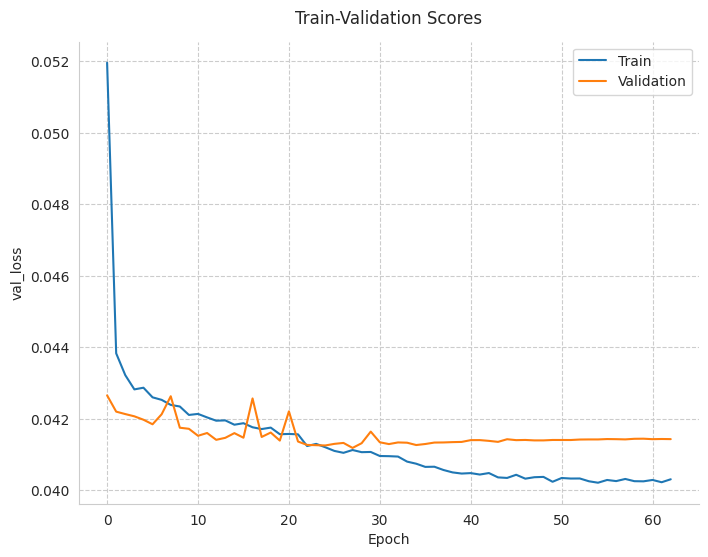

129/129 [==============================] - 2s 6ms/step
(33007, 1) (33007,)
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


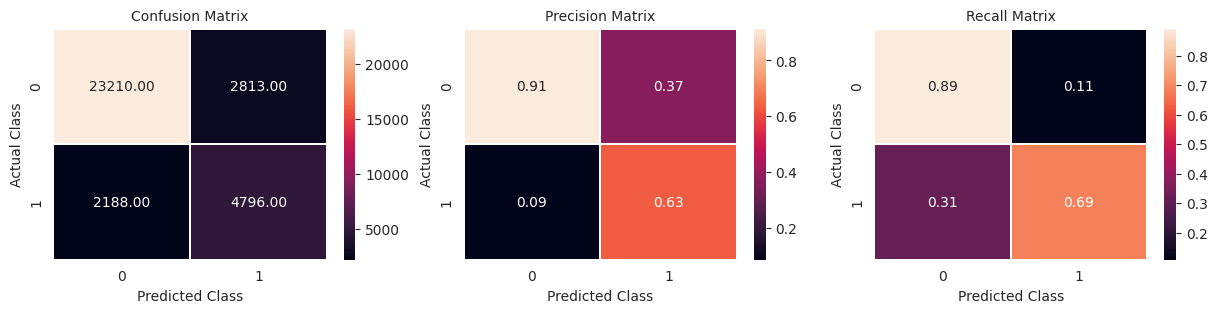


               precision    recall  f1-score   support

           0       0.91      0.89      0.90     26023
           1       0.63      0.69      0.66      6984

    accuracy                           0.85     33007
   macro avg       0.77      0.79      0.78     33007
weighted avg       0.85      0.85      0.85     33007

y_hat shape:(110023, 1)


AUC-Roc Score: 0.889%

Running CV 1

Adapting Features Space....
Start training the model...
Epoch 1/200
516/516 [==============================] - 27s 24ms/step - loss: 0.0520 - auc: 0.8468 - val_loss: 0.0432 - val_auc: 0.8818 - lr: 0.0010
Epoch 2/200
516/516 [==============================] - 15s 24ms/step - loss: 0.0438 - auc: 0.8761 - val_loss: 0.0433 - val_auc: 0.8849 - lr: 0.0010
Epoch 3/200
516/516 [==============================] - 14s 22ms/step - loss: 0.0434 - auc: 0.8786 - val_loss: 0.0423 - val_auc: 0.8856 - lr: 0.0010
Epoch 4/200
516/516 [==============================] - 13s 21ms/step - loss: 0.0429 - auc: 0.8807 - val_loss: 0.0418 - val_auc: 0.8867 - lr: 0.0010
Epoch 5/200
516/516 [==============================] - 14s 21ms/step - loss: 0.0427 - auc: 0.8815 - val_loss: 0.0424 - val_auc: 0.8865 - lr: 0.0010
Epoch 6/200
516/516 [==============================] - 13s 21ms/step - loss: 0.0426 - auc: 0.8824 - val_loss: 0.0421 - val_auc: 0.8854 - lr: 0.0010
Epoch 7/200
516/516

In [ ]:
test_results_df_all, test_results_df = run_experiment(X,
                                                      X_test,
                                                      input_format="dict",
                                                      experiment_name="model_baseline_v0",
                                                      splits=5,
                                                      n_repeats=5,
                                                      num_epochs=200,
                                                      batch_size=256)

### 4.4 Store Results

In [ ]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/"

list_directories = [folder_data,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/ already exists


In [ ]:
experiment_name="model_cb_v0_new_ds"

sub = pd.read_csv("sample_submission.csv", index_col=0)
sub.iloc[:,:] = test_results_df.values
sub.to_csv(f"Results/{experiment_name}.csv")
sub

,Exited
id,
165034,0.057956
165035,0.940149
165036,0.087481
165037,0.547713
165038,0.718544
...,...
275052,0.110747
275053,0.437689
275054,0.033856


In [ ]:
sub.loc[duplicate_results_test_df.index,:] = duplicate_results_test_df.values
sub.loc[duplicate_results_test_df.index,:]

sub.to_csv(f"Results/{experiment_name}_with_replacement.csv")

sub.loc[duplicate_results_test_df.index,:]

,Exited
id,
165430,1.0
165722,0.0
165984,1.0
166638,0.0
167218,0.0
...,...
272929,1.0
273022,1.0
273075,1.0


In [ ]:
train_results = pd.DataFrame(data=oof_results, columns=list(range(25)))
train_results["mean"] = train_results.mean(axis=1)
train_results_ = train_results[["mean"]]

#plt.scatter(train_results[1],train_results[12])
#train_results_.plot()
train_results_.to_csv((f"Results_oof/{experiment_name}_with_replacement_train.csv"))

In [ ]:
  x = tf.keras.layers.Dense(units_0, activation=activation, name="dense_in")(encoded_features_conc)
  x = tf.keras.layers.BatchNormalization(name="bn_in")(x)
  x = tf.keras.layers.Dropout(dropout,name="do_in")(x)

  x = tf.keras.layers.GaussianNoise(stddev=gn_noise, name="gsn")(x)

  for lr in range(hidden_layers):
    x = tf.keras.layers.Dense(units_1, activation=activation, name=f"dense_{lr}")(x)
    x = tf.keras.layers.BatchNormalization(name=f"bn_{lr}")(x)
    x = tf.keras.layers.Dropout(dropout,name=f"do_{lr}")(x)

  output = tf.keras.layers.Dense(3, activation="softmax",name="output_final")(x)

In [ ]:
gc.collect()